# Fit a curved line

This notebook will help you plot the **strength-duration curve** for your earthworm.

**Note**: If you're new to Jupyter Notebooks and/or Python, please be sure to work through the Introduction notebook before this one.

## Step 1. Define values to plot
With matplotlib imported, we can now use the scatter function by calling `plt.scatter()`. However, we need to define what to plot first. One straightforward way to think about this is to define an x variable and a y variable. Below, there are **lists** of values (defined in brackets `[ ]`) assigned to `x` and `y`. Replace these with your own values, depending on what you'd like to plot on the x and y axis of your strength duration curve.

**Note**: Remember that in a scatterplot, each dot has both an x and a y value. Therefore, these lists should be the same length. The coordinate for each point will be the values at the same **index** in `x` and `y`. For example, the coordinate for the very first point will be `x[0],y[0]`.

In [1]:
# Add your data points here
x = [1,2,3,4,5,6]
y = [1,0.8,0.5,0.45,0.4,0.4]

%whos

Variable   Type    Data/Info
----------------------------
x          list    n=6
y          list    n=6


## Step 2. Fit a hyperbolic curve to hypothetical data

The strength-duration curve should follow a **hyperbolic** function:

$$
a = r + \frac{r+c}{t}
$$

where **a** is the stimulus amplitude (in amps or volts), **r** is the rheobase, **c** is the chronaxie, and **t** is time (the width of the stimulus).

We'll first define that function below:

In [2]:
# Define the hyperbolic curve function
def func(t, r, c):
    return r+((r*c)/t) #hyperbolic function

To demonstrate what this function looks like, we'll use `np.linspace()` to generate a list of 100 numbers from 0 to 1, with 0.01 spacing. We'll also define a sample rheobase and chronaxie. Then, from those points, we'll fit a hyperbolic curve using `scipy.optimize.curve_fit()`, which uses non-linear least squares to fit a function to data. See the [curve_fit documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/

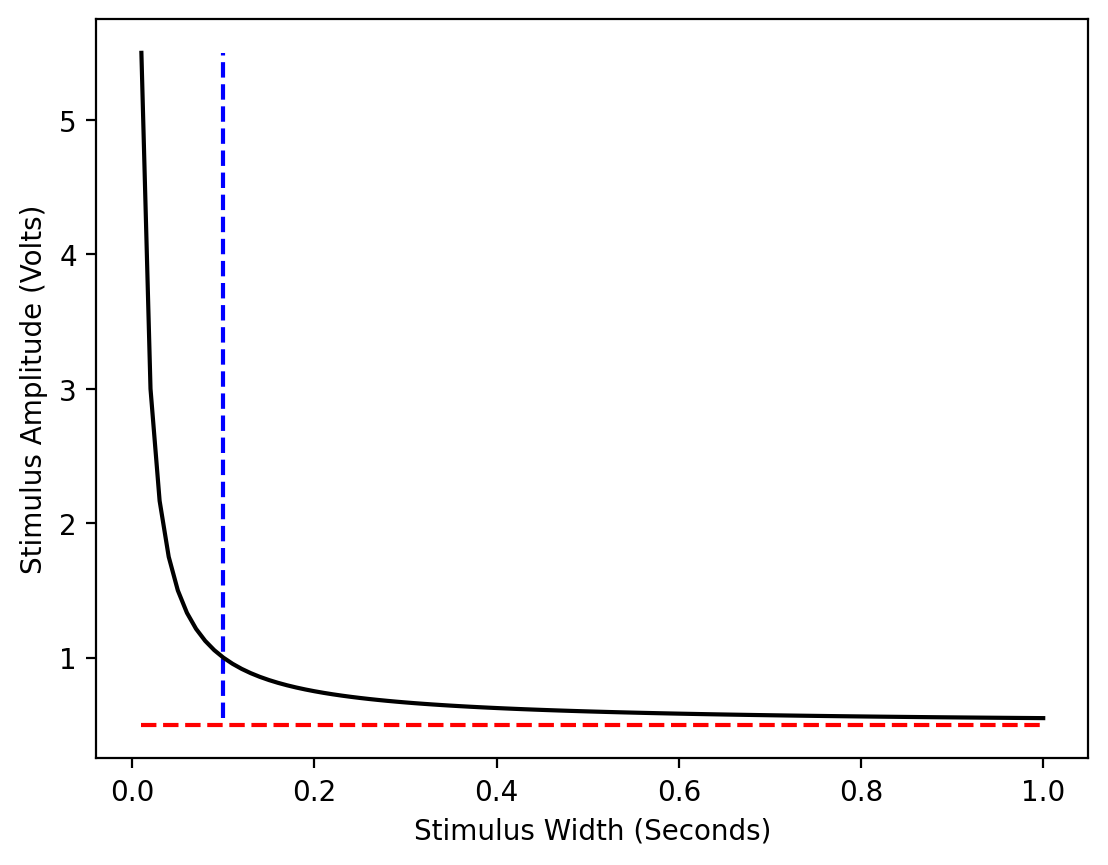

In [3]:
# Import numpy & curve fitting package
import numpy as np
from scipy.optimize import curve_fit

# Import & configure plotting packages
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# Define pulse
pulse_width = np.linspace(0.01,1,100)
rheobase = .5 # in V
chronaxie = 0.1 # in ms

amplitude = rheobase+((rheobase*chronaxie)/pulse_width)

# Use our function & fit the curve!
sample_popt, sample_pcov = curve_fit(func,pulse_width,amplitude)

# Plot a regression line, using the slope & intercept
plt.plot(pulse_width, func(pulse_width, *sample_popt), 'black')

# Plot chronaxie & rheobase lines
plt.vlines(chronaxie,amplitude.min(),amplitude.max(),color='blue',linestyle='--')
plt.hlines(rheobase,pulse_width.min(),pulse_width.max(),color='red',linestyle='--')

# Label the axes & show plot
plt.ylabel('Stimulus Amplitude (Volts)')
plt.xlabel('Stimulus Width (Seconds)')

plt.show()

## Step 3. Fit a hyperbolic curve to *your* data

Above, you can see a perfectly fit curve, with the <font color='red'><b>rheobase</b></font> and  <font color='blue'><b>chronaxie</b></font>  labeled.
    
Now, let's do the same, but with your data.

/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ashley/anaconda3/envs/jb/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_restore" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


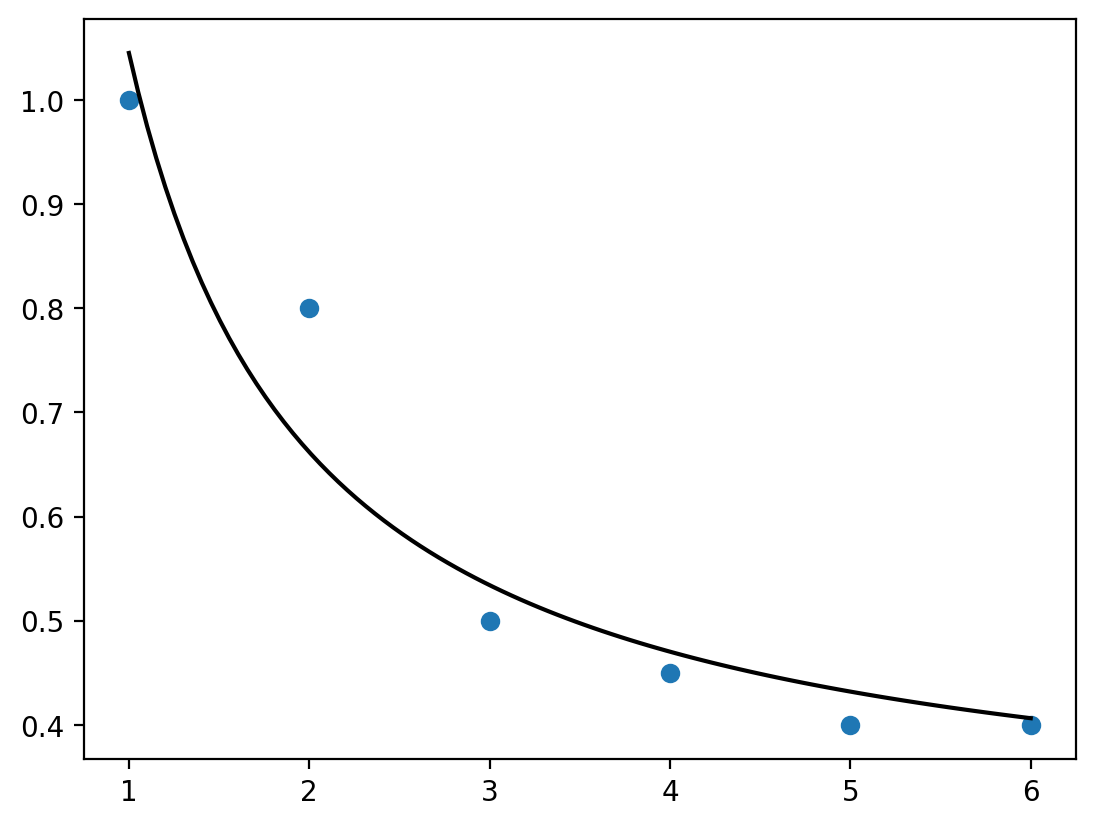

In [4]:
# Transform x & y data into arrays
x = np.array(x)
y = np.array(y)

# Fit the curve with your data!
popt, pcov = curve_fit(func,x,y)

# Generate additional x-values to make a smoooth curve
xnew = np.linspace(x.min(),x.max(), 100)

# Plot a regression line, using the slope & intercept
plt.plot(xnew, func(xnew, *popt), 'black')
plt.scatter(x,y)

# Optional -- can you figure out how to add rheobase & chronaxie?

# Add your labels here!

plt.show()

It is also important to know how well our curve fits. To do so, we'll calculate the residuals and then the sum of squares.

In [5]:
#  Calculate the distance (on y axis) from data to curve
residuals = y - func(x, *popt)

# Calculate the residual sum of squares
ss_res = np.sum(residuals**2)

# Calculate the total sum of squares
ss_tot = np.sum((y-np.mean(y))**2)

# Calculate r-squared
r_squared = 1 - (ss_res / ss_tot)

print('R^2 = ',r_squared)
print('Rheobase: ' , popt[0])
print('Chronaxie:  ', popt[1])

R^2 =  0.9239011751642454
Rheobase:  0.278745874411597
Chronaxie:   2.749230408204977
